In [4]:
from countcoins.config import df_annotations_path
from countcoins.data.IO import read_df_annotation
from countcoins.data.preprocess import add_split_column
from countcoins.visualization import visualize_metrics
from countcoins.config import data_path, models_path
from countcoins.modelling.classical_cv import ClassicalCVModel
from countcoins.modelling.deep_learning import TrainedDeepLearningModel
from countcoins.modelling.evaluating import compute_metrics, get_all_predictions

In [5]:
df_annotations = read_df_annotation(df_annotations_path)
df_annotations = add_split_column(df_annotations)

df_annotations

,currencies,coins_count,set
image_name,,,
174dd15a12.jpg,euro_coins,16,train
b4971d4f15.jpg,yen_coins,1,train
66bbd666dc.jpg,euro_coins,8,train
7262427976.jpg,all_coins,1,train
aab9a625c4.jpg,china_coins,1,train
...,...,...,...
5a93f5b090.jpg,yen_coins,2,test
4a4bd0f725.jpg,all_coins,40,test
2bf5e82e5a.jpg,all_coins,8,test


In [6]:
model = ClassicalCVModel()
model = TrainedDeepLearningModel(models_path=models_path, experiment_name='experiment_1')

In [7]:
df_predictions = get_all_predictions(model=model,
                                     data_path=data_path,
                                     df_annotations=df_annotations, 
                                     only_test_set=True)

434it [00:03, 141.03it/s]


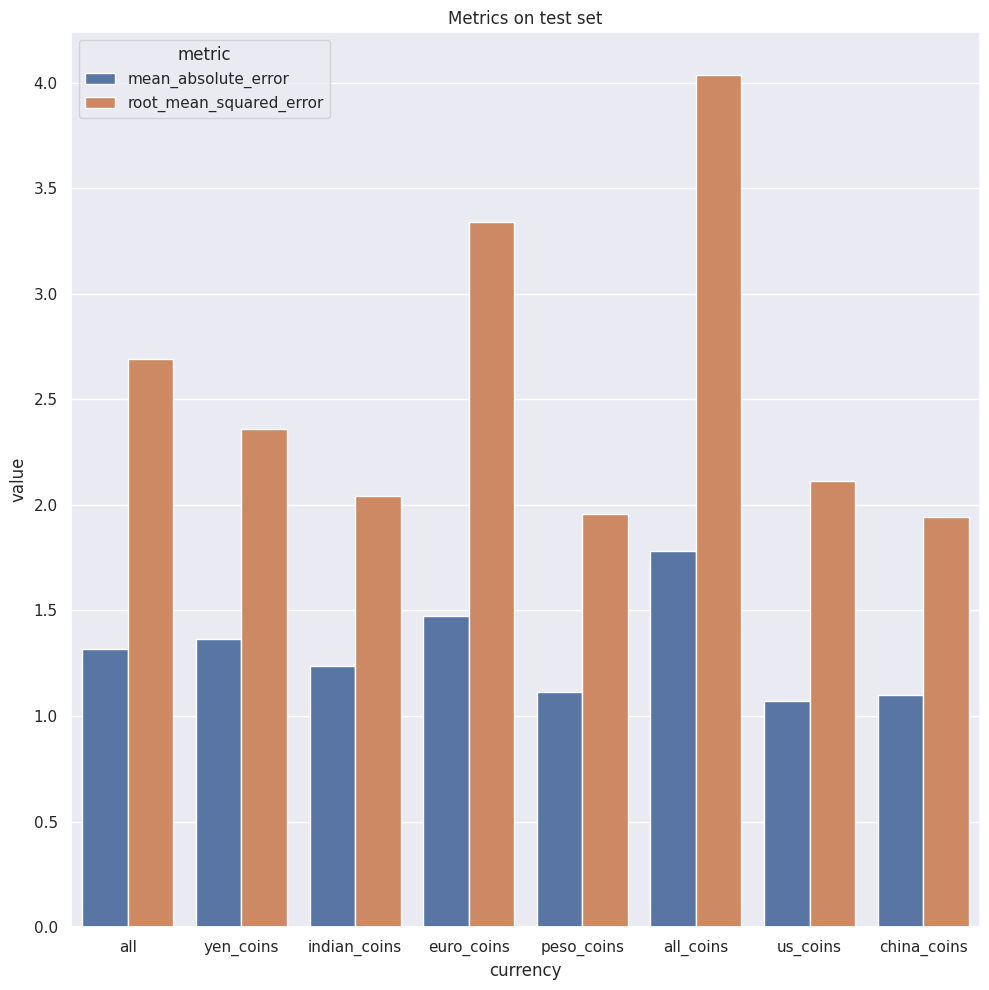

In [8]:
df_metrics = compute_metrics(df_predictions=df_predictions)
visualize_metrics(df_metrics=df_metrics, plt_close=True)